### **Importing libraries**




In [ ]:
import tensorflow as tf 
import pandas as pd 
from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np
from sklearn.model_selection import train_test_split
import random 


### **Importing datasets**

In [ ]:
 !pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d rishianand/devanagari-character-set
! unzip devanagari-character-set.zip

Streaming output truncated to the last 5000 lines.
  inflating: Images/Images/digit_7/56661.png  
  inflating: Images/Images/digit_7/56662.png  
  inflating: Images/Images/digit_7/56663.png  
  inflating: Images/Images/digit_7/56664.png  
  inflating: Images/Images/digit_7/56665.png  
  inflating: Images/Images/digit_7/56666.png  
  inflating: Images/Images/digit_7/56667.png  
  inflating: Images/Images/digit_7/56668.png  
  inflating: Images/Images/digit_7/56669.png  
  inflating: Images/Images/digit_7/56670.png  
  inflating: Images/Images/digit_7/56671.png  
  inflating: Images/Images/digit_7/56672.png  
  inflating: Images/Images/digit_7/56673.png  
  inflating: Images/Images/digit_7/56674.png  
  inflating: Images/Images/digit_7/56675.png  
  inflating: Images/Images/digit_7/56676.png  
  inflating: Images/Images/digit_7/56677.png  
  inflating: Images/Images/digit_7/56678.png  
  inflating: Images/Images/digit_7/56679.png  
  inflating: Images/Images/digit_7/56680.png  
  inflati


1.   Separating features and labels
2.   Dividing into testing and training datasets
3. Converting Labels to 1-D arrays


In [ ]:
data = pd.read_csv('data.csv', header=None)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,2

In [ ]:
data=data.values

In [ ]:
data,output = data[1:,:1024],data[1:,1024]

In [ ]:
yt = {}
c = 0
a = []
for i in output:
    if i not in yt:
        yt[i] = c
        c+=1
    a.append(yt[i])
output = np.array(a)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(data,output, train_size = 0.75)
xtrain=xtrain.astype(np.int32)
xtest=xtest.astype(np.int32)

In [ ]:
labels = "क ख ग घ ङ च छ ज झ ञ ट ठ ड ढ ण त थ द ध न प फ ब भ म य र ल व श ष स ह chhya tra gya ० १ २ ३ ४ ५ ६ ७ ८ ९".split()

In [ ]:
xtrain=xtrain/255.0
xtest=xtest/255.0;yp=ytrain
xtrain = xtrain.reshape(-1,32,32,1) 

xtest=xtest.reshape(-1,32,32,1)
ytrain=tf.keras.utils.to_categorical(ytrain,num_classes=46)
ytest=tf.keras.utils.to_categorical(ytest,num_classes=46)

# Defining and training CNN

In [ ]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(35, (2,2), activation='relu', input_shape=(32,32,1)),
    
    tf.keras.layers.Conv2D(50, (2,2), padding="same", activation='relu'),
    tf.keras.layers.AveragePooling2D(2),
    tf.keras.layers.Conv2D(70, (2,2), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(100,2,padding="same",activation="relu"),

    tf.keras.layers.Flatten(),  
    tf.keras.layers.Dense(1024,activation="relu"), 
    
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1024, activation='relu'),  
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256,activation="sigmoid"),
    
    tf.keras.layers.Dense(46, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 31, 35)        175       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 31, 50)        7050      
_________________________________________________________________
average_pooling2d (AveragePo (None, 15, 15, 50)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 70)        14070     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 70)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 100)         28100     
_________________________________________________________________
flatten (Flatten)            (None, 4900)              0

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=10e-4),loss="categorical_crossentropy",metrics=["accuracy"])
history =model.fit(xtrain,ytrain,epochs=50,verbose=1,steps_per_epoch=150,batch_size=300,callbacks=[LearningRateScheduler(lambda x:1e-3*0.9**x)],validation_data=(xtest,ytest),use_multiprocessing=True)

Epoch 1/50
150/150 [==============================] - 37s 34ms/step - loss: 0.8233 - accuracy: 0.8170 - val_loss: 0.8613 - val_accuracy: 0.9517
Epoch 2/50
150/150 [==============================] - 5s 32ms/step - loss: 0.1271 - accuracy: 0.9674 - val_loss: 0.1846 - val_accuracy: 0.9724
Epoch 3/50
150/150 [==============================] - 5s 32ms/step - loss: 0.0772 - accuracy: 0.9794 - val_loss: 0.0857 - val_accuracy: 0.9758
Epoch 4/50
150/150 [==============================] - 5s 32ms/step - loss: 0.0440 - accuracy: 0.9883 - val_loss: 0.0701 - val_accuracy: 0.9806
Epoch 5/50
150/150 [==============================] - 5s 32ms/step - loss: 0.0293 - accuracy: 0.9929 - val_loss: 0.0533 - val_accuracy: 0.9853
Epoch 6/50
150/150 [==============================] - 5s 32ms/step - loss: 0.0193 - accuracy: 0.9955 - val_loss: 0.0565 - val_accuracy: 0.9843
Epoch 7/50
150/150 [==============================] - 5s 32ms/step - loss: 0.0147 - accuracy: 0.9966 - val_loss: 0.0457 - val_accuracy: 0.987

In [ ]:

model.evaluate(xtest, ytest, batch_size = 32,max_queue_size=10)

719/719 [==============================] - 3s 5ms/step - loss: 0.0396 - accuracy: 0.9906


[0.03963857516646385, 0.9905652403831482]

# **Plotting accurac and loss graphs**

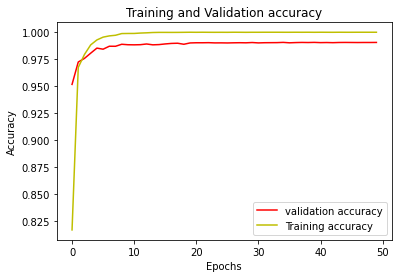

In [ ]:
hist = history
acc_val = hist.history['val_accuracy']
acc_train = hist.history['accuracy']
epochs = range(0,50)

plt.plot(epochs, acc_val, 'r', label='validation accuracy')
plt.plot(epochs, acc_train, 'y', label='Training accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

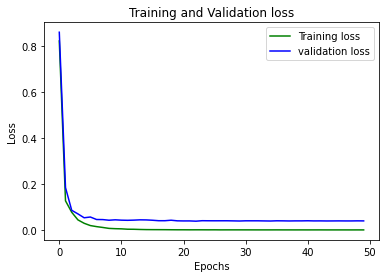

In [ ]:
hist = history
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']

epochs = range(0,50)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')

plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Saving model**

In [ ]:
import keras
model.save("hindi_model.h5")
model = keras.models.load_model('hindi_model.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
! cd gdrive/MyDrive
! mkdir "gdrive/MyDrive/ML"

! cp hindi_model.h5 "gdrive/MyDrive/ML"
! cp kaggle.json "gdrive/MyDrive/ML"

mkdir: cannot create directory ‘gdrive/MyDrive/ML’: File exists


In [ ]:
def getprediction(i):

    img = np.float32(xtest[i])
    img = np.reshape(img, (32,32))
    

    plt.imshow(img*255, cmap=plt.get_cmap('gray'))
    plt.show()
    
    img = np.reshape(img, (-1,32,32,1))
    

    ypred = model.predict(img)
    
    predClass = np.argmax(ypred, axis= 1)
   
    prediction = labels[predClass[0]]
    
    print("The predicted label is " + prediction)

    print("The actual label is " + labels[int(np.argmax(ytest[i]))])




# **Viewing some random images from testing data**

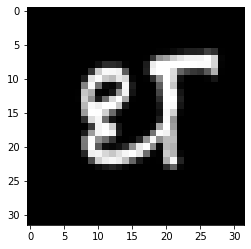

The predicted label is ध
The actual label is ध


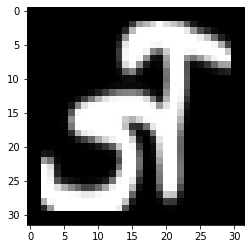

The predicted label is ज
The actual label is ज


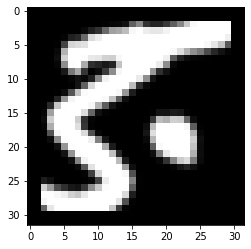

The predicted label is ङ
The actual label is ङ


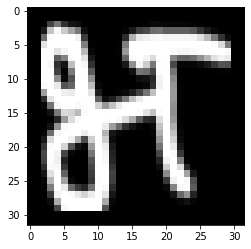

The predicted label is भ
The actual label is भ


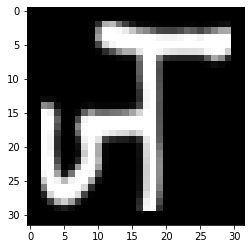

The predicted label is ज
The actual label is ज


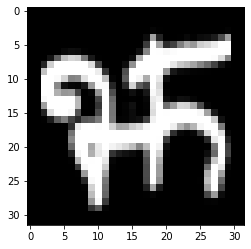

The predicted label is झ
The actual label is झ


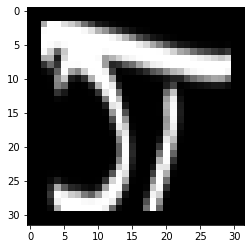

The predicted label is ग
The actual label is ग


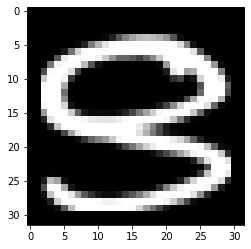

The predicted label is ९
The actual label is ९


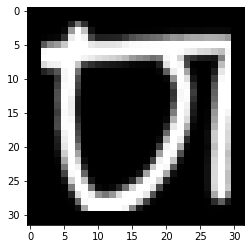

The predicted label is ण
The actual label is ण


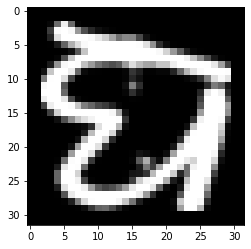

The predicted label is घ
The actual label is घ


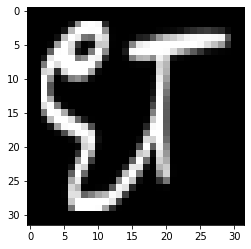

The predicted label is ध
The actual label is ध


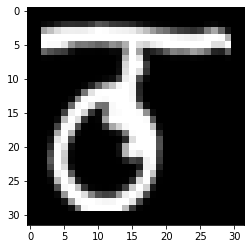

The predicted label is ठ
The actual label is ठ


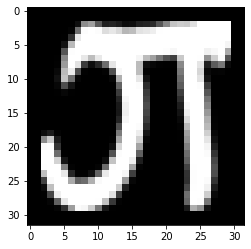

The predicted label is ग
The actual label is ग


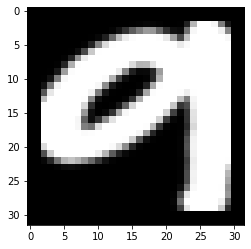

The predicted label is १
The actual label is १


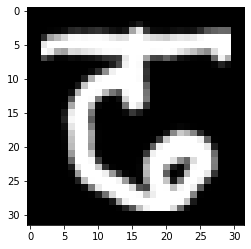

The predicted label is ढ
The actual label is ढ


In [ ]:
for i in range(15):
    getprediction(random.randint(0,len(ytest)-1))

# **Viewing top 20 most significant errors**

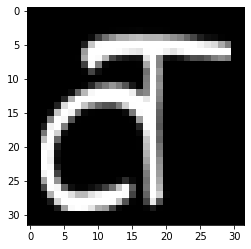

Predicted label is व
Actual label is त


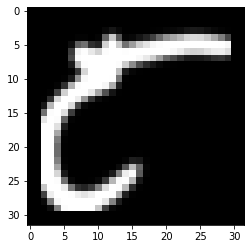

Predicted label is ८
Actual label is ट


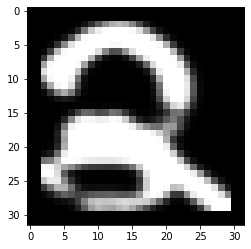

Predicted label is २
Actual label is ३


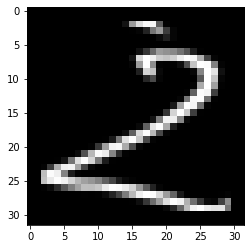

Predicted label is २
Actual label is र


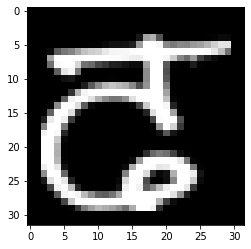

Predicted label is ढ
Actual label is द


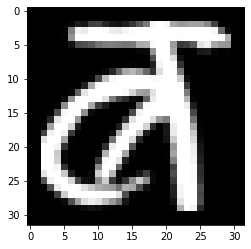

Predicted label is ब
Actual label is tra


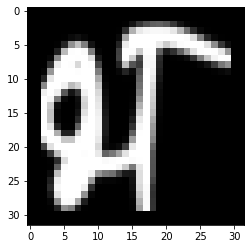

Predicted label is थ
Actual label is भ


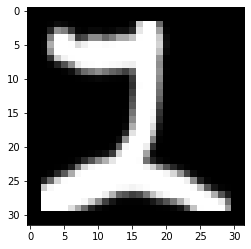

Predicted label is र
Actual label is ५


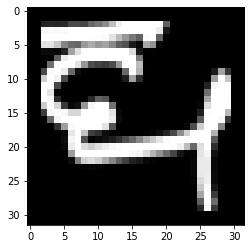

Predicted label is घ
Actual label is छ


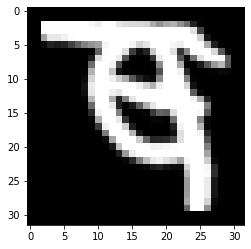

Predicted label is ष
Actual label is ब


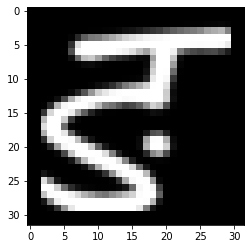

Predicted label is ड
Actual label is ङ


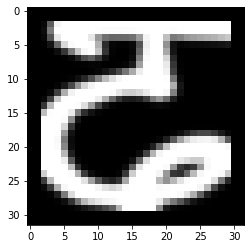

Predicted label is ढ
Actual label is द


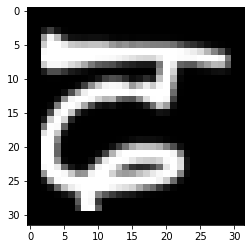

Predicted label is द
Actual label is ढ


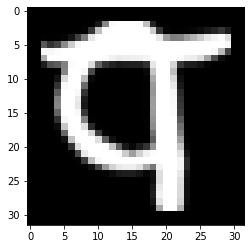

Predicted label is प
Actual label is व


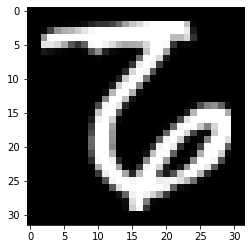

Predicted label is ढ
Actual label is द


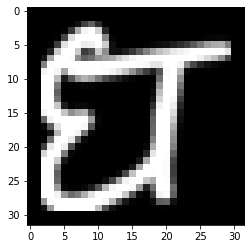

Predicted label is ध
Actual label is घ


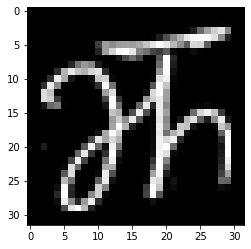

Predicted label is झ
Actual label is भ


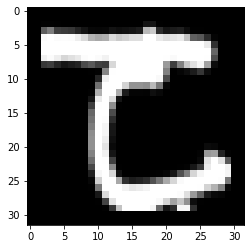

Predicted label is ८
Actual label is ट


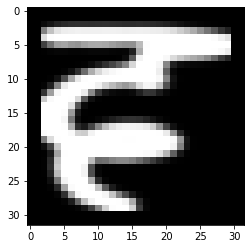

Predicted label is ह
Actual label is द


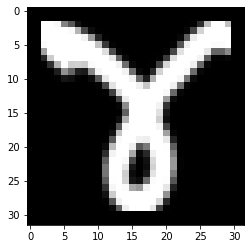

Predicted label is ४
Actual label is ५


In [ ]:
errors = (Y_pred_classes - Y_true != 0)


Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = xtest[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    
    n = 0
    nrows = 4
    ncols = 5
    
    for row in range(nrows):

        for col in range(ncols):
            error = errors_index[n] 
            
            plt.imshow((img_errors[error]*255).reshape(32,32),cmap=plt.get_cmap('gray'))
            plt.show()
            print("Predicted label is " + labels[pred_errors[error]])
            print("Actual label is " + labels[obs_errors[error]])
            n+=1
Y_pred_errors_prob = np.max(Y_pred_errors,axis=1)


true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors,axis=1))

delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors


sorted_dela_errors = np.argsort(delta_pred_true_errors)


most_important_errors = sorted_dela_errors[-20:]

display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)